In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
results_path = os.path.join('computed_stats', 'kruskal.csv')
alpha = 1e-9

# Load data
results = pd.read_csv(results_path)

# Drop STRs where all populations had the same repeat count
results = results.dropna().reset_index(drop=True)

# Correct p-values
results['kruskal_pval_bonf'] = results.kruskal_pval * len(results)

# Identify significant correlations
results['is_significant'] = results.kruskal_pval_bonf < alpha
results

In [3]:
coding_regions = pd.read_csv("/gymreklab-tscc/helia/ensembl/experiments/coding_regions/mapping.txt", sep = "\t", header=None)
coding_diff = pd.merge(results, coding_regions, left_on = ["chr","position"], right_on=[0,1])
coding_diff = coding_diff[coding_diff['is_significant'] == True].sort_values('kruskal_pval_bonf')
coding_diff

,Unnamed: 0,chr,position,motif_len,kruskal_statistic,kruskal_pval,kruskal_pval_bonf,is_significant,0,1,2,3,4,5,6,7,8
1809,1043614,chr10,75022076,3,1750.990143,0.000000e+00,0.000000e+00,True,chr10,75022076,75022171,chr10,75021880,75022123,ENST00000648159.1_cds_15_0_chr10_75021881_f,0,+
1594,912242,chr8,123369904,3,1573.084082,0.000000e+00,0.000000e+00,True,chr8,123369904,123369994,chr8,123369820,123370024,ENST00000287394.10_cds_21_0_chr8_123369821_r,0,-
1116,636145,chr5,181260422,3,1845.794711,0.000000e+00,0.000000e+00,True,chr5,181260422,181260441,chr5,181260000,181260813,ENST00000503005.2_cds_1_0_chr5_181260001_r,0,-
2016,1123749,chr11,73309324,3,2278.202135,0.000000e+00,0.000000e+00,True,chr11,73309324,73309343,chr11,73308638,73311830,ENST00000263674.4_cds_0_0_chr11_73308639_f,0,+
3545,1655737,chr20,35226774,3,1704.157930,0.000000e+00,0.000000e+00,True,chr20,35226774,35226798,chr20,35226738,35226984,ENST00000246186.8_cds_0_0_chr20_35226739_f,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,609656,chr5,141433209,1,78.504339,3.612341e-16,4.599634e-10,True,chr5,141433209,141433220,chr5,141430759,141433222,ENST00000613314.1_cds_0_0_chr5_141430760_f,0,+
3196,1585167,chr19,3613229,6,78.154511,4.284118e-16,5.455015e-10,True,chr19,3613229,3613278,chr19,3613057,3613365,ENST00000221899.7_cds_3_0_chr19_3613058_r,0,-
1234,696975,chr6,98835245,3,78.091037,4.418763e-16,5.626460e-10,True,chr6,98835245,98835340,chr6,98834873,98836205,ENST00000328345.8_cds_0_0_chr6_98834874_f,0,+
1233,696975,chr6,98835245,3,78.091037,4.418763e-16,5.626460e-10,True,chr6,98835245,98835321,chr6,98834873,98836205,ENST00000328345.8_cds_0_0_chr6_98834874_f,0,+


In [4]:
str_data_cache = {}

In [5]:
data_dir_path = 'preprocessed_data'
interesting_loci = []
def plot(chrom, pos, gene):

# Get STR data
    if chrom not in str_data_cache:
        str_data = pd.read_csv(os.path.join(data_dir_path, f'{chrom}.csv'))
        str_data_cache[chrom] = str_data.drop_duplicates()
    str_data = str_data_cache[chrom]
    
    example_data = str_data[str_data.position == pos].iloc[0]
    

    # Get diffs for each population and make dataframe
    diff_data = []
    for pop in ['AMR', 'AFR', 'EAS', 'EUR', 'SAS']:
        diffs = example_data[f'diffs_{pop}'].strip(' []').split(',')
        diff_data.extend(
                [{'Super Population': pop, 'diff_n_bases': int(d.strip())} for d in diffs]
                )


    diff_data = pd.DataFrame(diff_data)
    diff_data['Copy Num. From Ref.'] = diff_data.diff_n_bases / example_data.motif_len
    
    if abs(max(diff_data['Copy Num. From Ref.'])) < 10:
        return
    
    interesting_loci.append((chrom,pos,gene))
    # Plot
    sns.displot(
        data=diff_data,
        x='Copy Num. From Ref.',
        hue='Super Population',
        kind="kde",
        common_norm=False,
        common_grid=True,
        bw_adjust=1.5
    )
    plt.suptitle(f"STR Copy Number Distribution for {chrom}:{pos}")
    plt.tight_layout()
    #plt.savefig(os.path.join(plot_save_dir, f"{results.iloc[i].chr}_{results.iloc[i].position}.png"))
    plt.show()

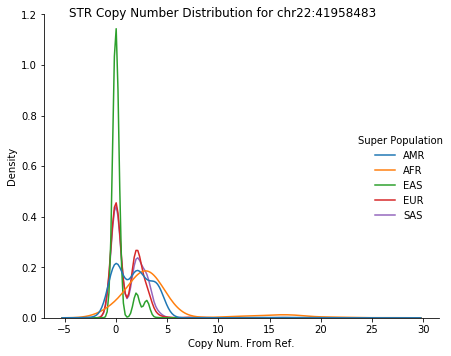

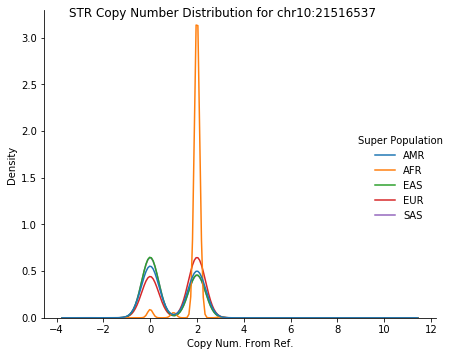

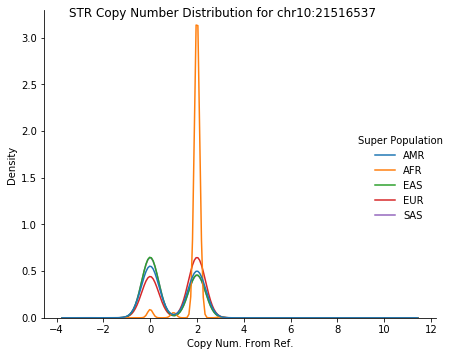

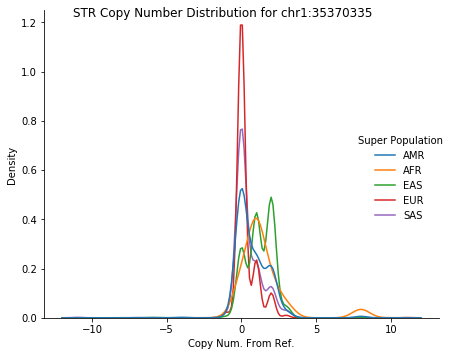

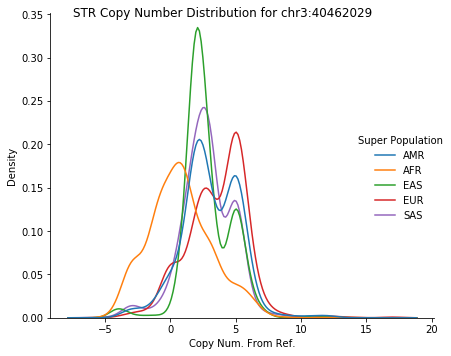

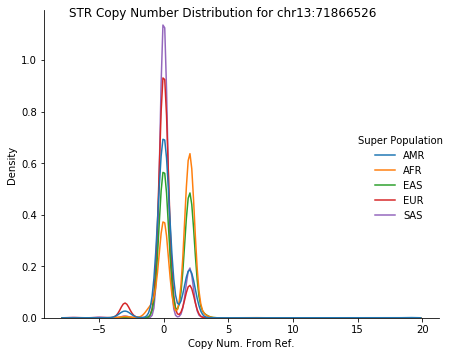

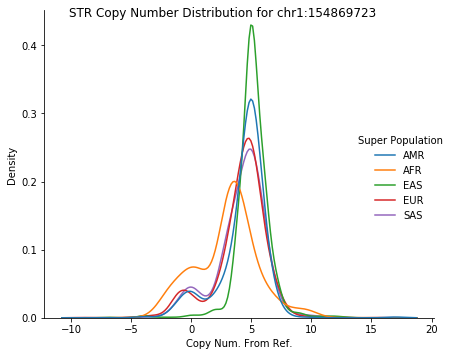

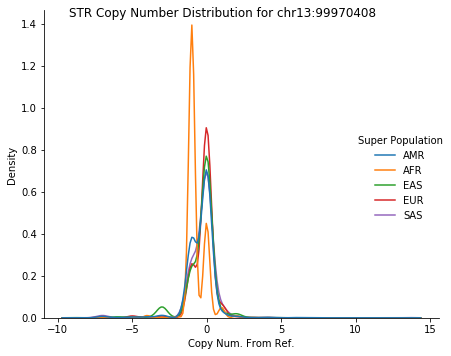

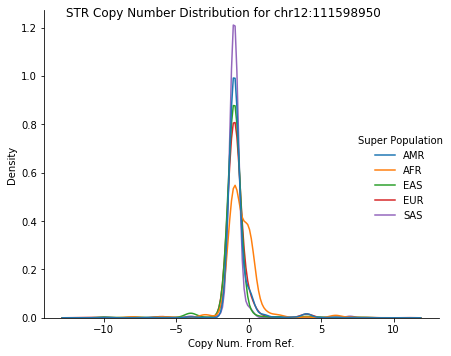

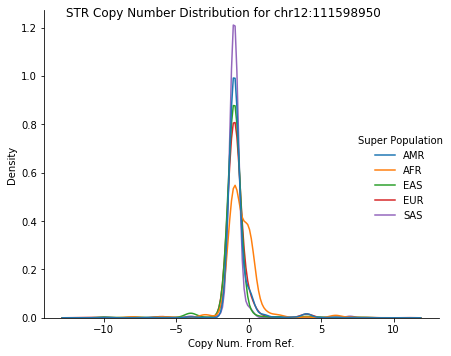

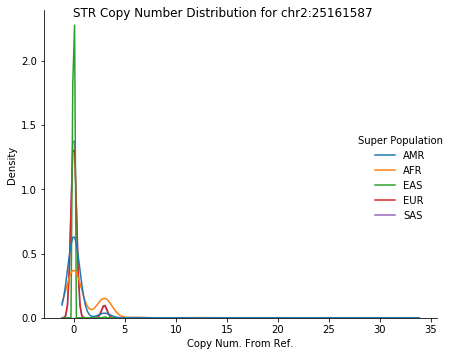

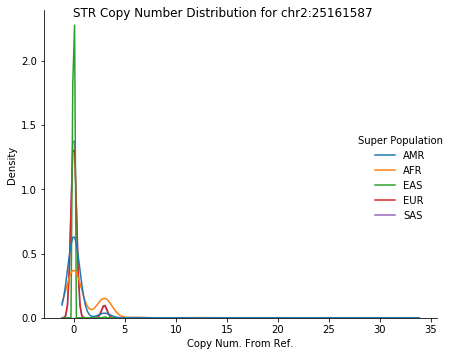

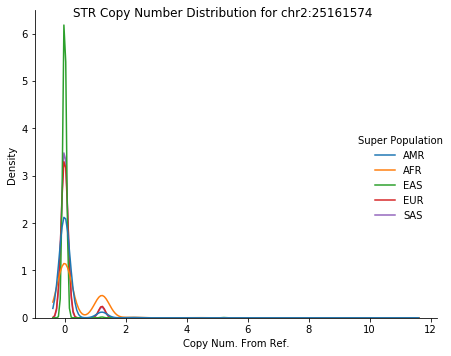

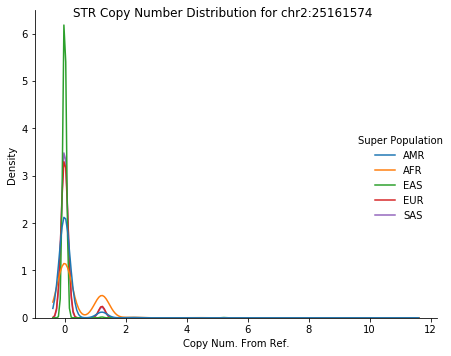

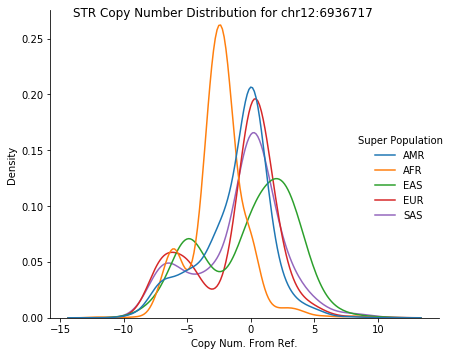

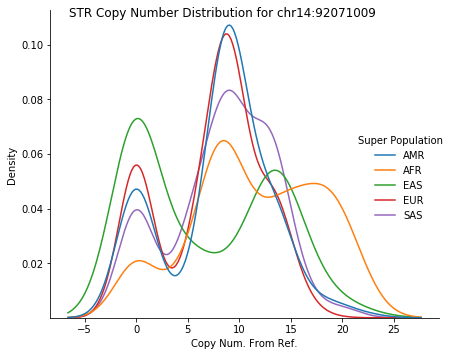

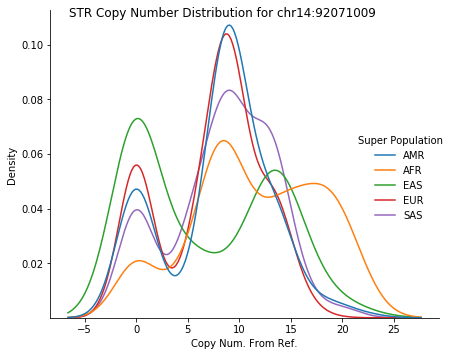

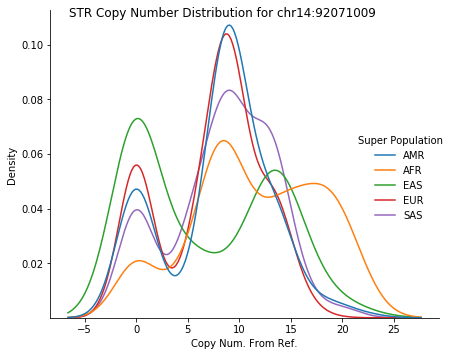

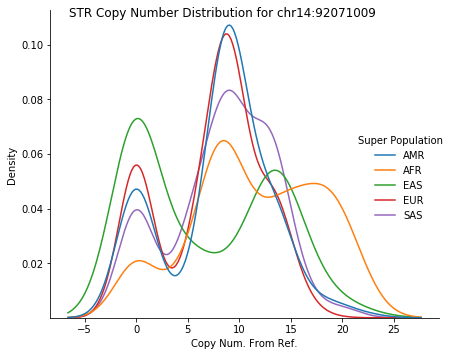

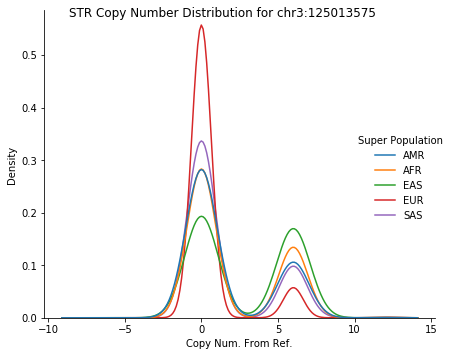

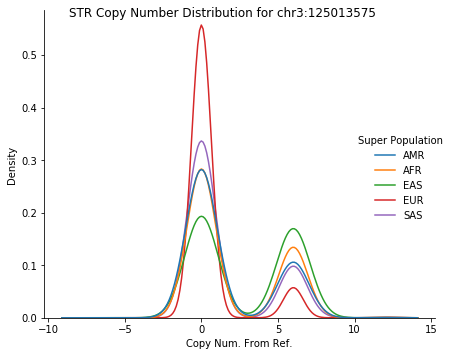

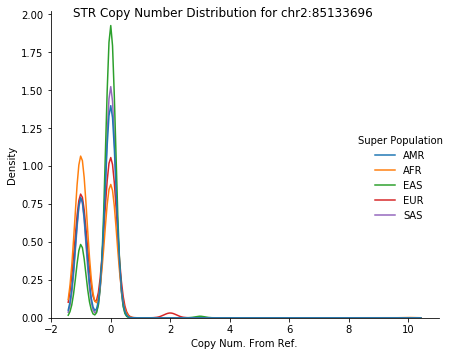

/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


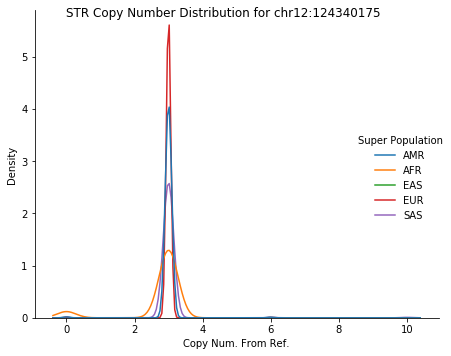

/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


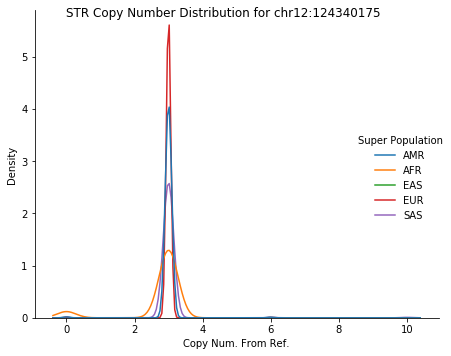

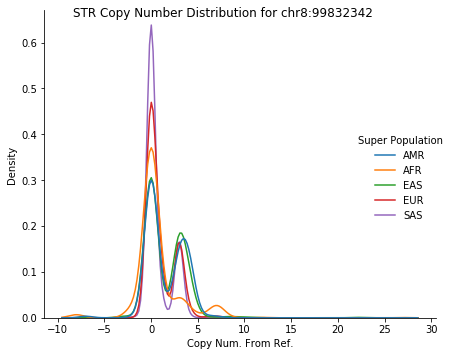

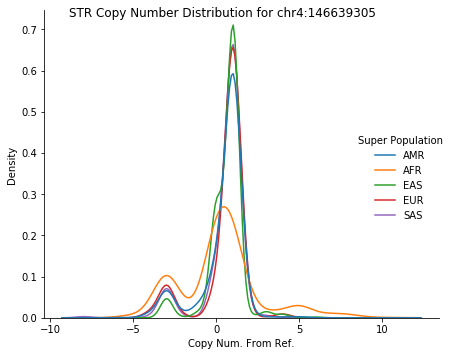

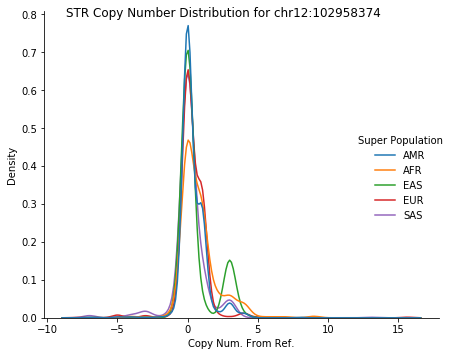

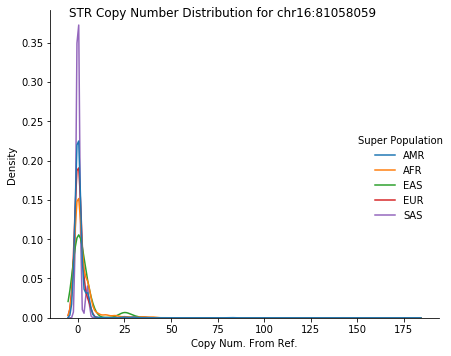

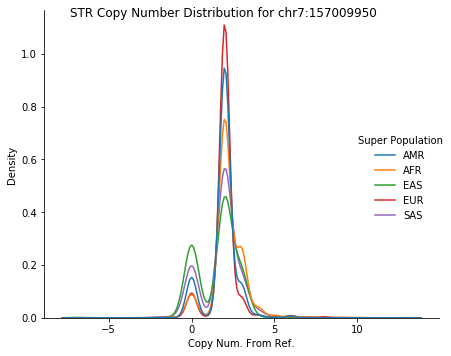

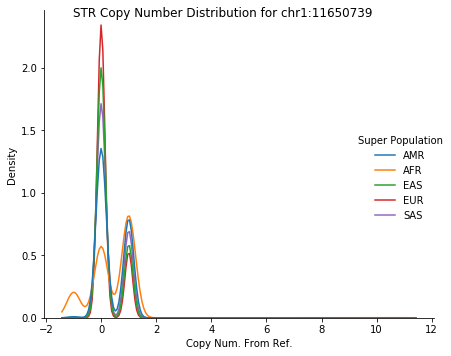

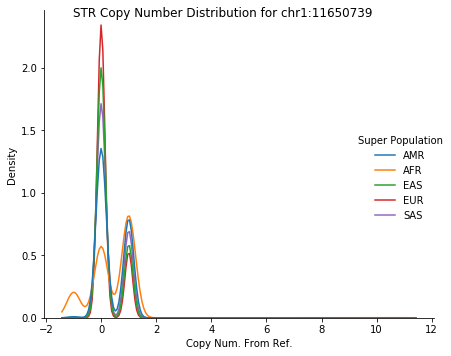

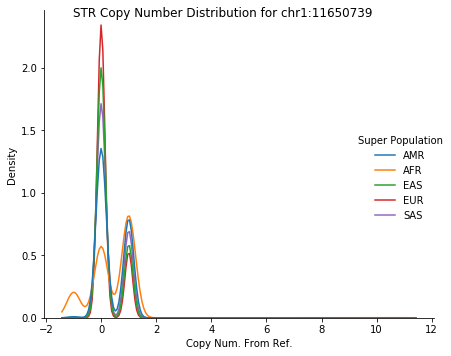

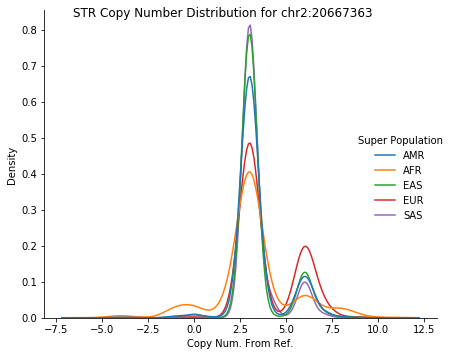

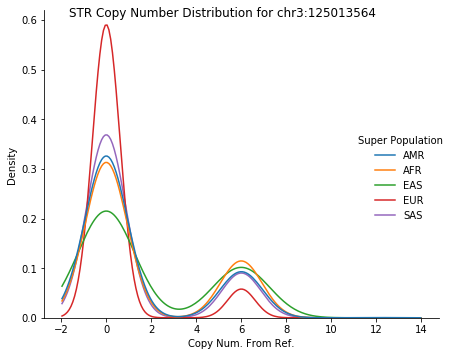

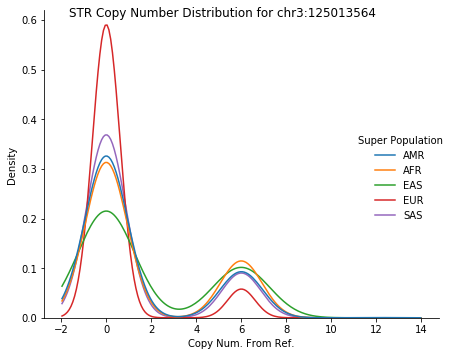

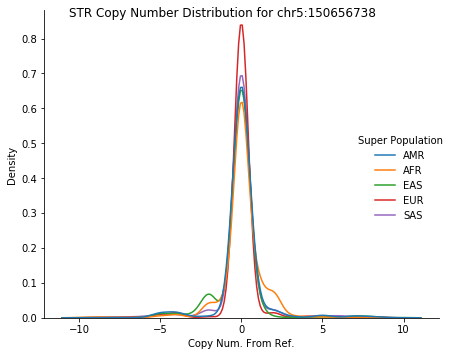

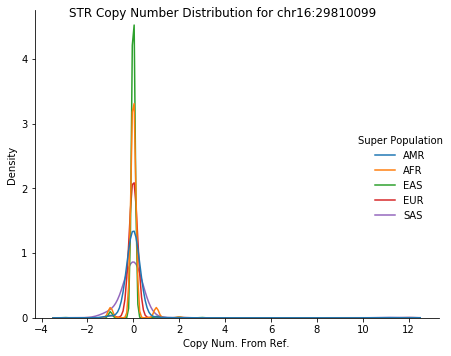

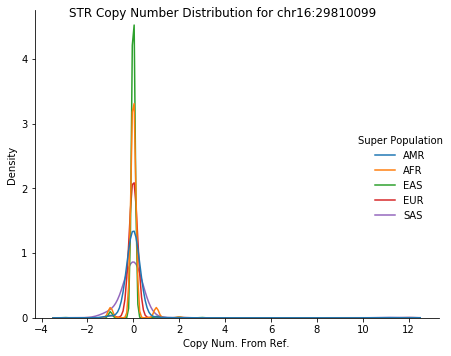

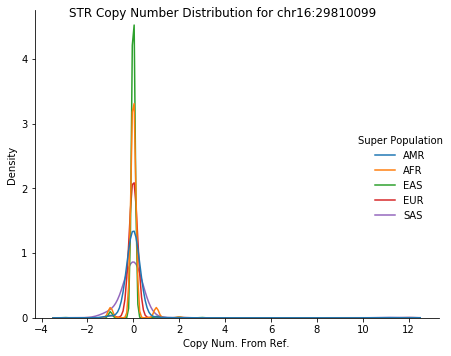

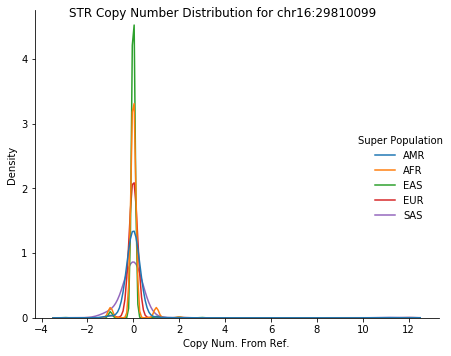

In [6]:
for index,row in coding_diff.iterrows():
    plot(row['chr'], row['position'], row[6])

In [47]:
chrom = 'chr2'
pos = 25161587
str_data = str_data_cache[chrom]
example_data = str_data[str_data.position == pos].iloc[0]
data = example_data['diffs_EUR'].strip(' []').split(',')
data = [int(x)/int(example_data.motif_len) for x in data]
print(example_data.motif_len)
np.histogram([int(x) for x in data], bins=np.arange(-5,13), density = False)

3


(array([   0,    0,    0,    0,    0, 1180,    0,    0,   86,    0,    0,
           0,    0,    0,    0,    0,    0]),
 array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        12]))

In [7]:
interesting_loci


[('chr22', 41958483, 'ENST00000669957.1_cds_0_0_chr22_41958217_f'),
 ('chr10', 21516537, 'ENST00000449193.7_cds_0_0_chr10_21515096_r'),
 ('chr10', 21516537, 'ENST00000444772.3_cds_0_0_chr10_21515096_r'),
 ('chr1', 35370335, 'ENST00000314607.11_cds_6_0_chr1_35370372_f'),
 ('chr3', 40462029, 'ENST00000338970.10_cds_5_0_chr3_40461939_f'),
 ('chr13', 71866526, 'ENST00000611519.4_cds_7_0_chr13_71865922_r'),
 ('chr1', 154869723, 'ENST00000271915.9_cds_7_0_chr1_154869032_r'),
 ('chr13', 99970408, 'ENST00000267294.5_cds_1_0_chr13_99970127_r'),
 ('chr12', 111598950, 'ENST00000550104.5_cds_24_0_chr12_111598784_r'),
 ('chr12', 111598950, 'ENST00000389153.10_cds_23_0_chr12_111598784_r'),
 ('chr2', 25161587, 'ENST00000264708.7_cds_0_0_chr2_25161081_r'),
 ('chr2', 25161587, 'ENST00000449220.1_cds_0_0_chr2_25161146_r'),
 ('chr2', 25161574, 'ENST00000449220.1_cds_0_0_chr2_25161146_r'),
 ('chr2', 25161574, 'ENST00000264708.7_cds_0_0_chr2_25161081_r'),
 ('chr12', 6936717, 'ENST00000356654.8_cds_4_0_chr1

In [35]:
coding_regions = pd.read_csv("/gymreklab-tscc/helia/ensembl/experiments/coding_regions/mapping.txt", sep = "\t", header=None)

In [41]:
coding_regions[1] = pd.to_numeric(coding_regions[1])
coding_regions[(coding_regions[0] == "chr17") & (coding_regions[1] > 51631583) & (coding_regions[1] < 51636583)]

,0,1,2,3,4,5,6,7,8
